<시작하세요! 텐서플로 2.0 프로그래밍> 예제코드입니다.

- 예제 코드를 실행하기 위해서는 [파일] > [드라이브에 사본 저장]으로 본인의 계정에 사본을 만든 다음 실행하면 됩니다.
- 예제 코드는 [깃허브 저장소](https://github.com/wikibook/tf2)에서도 동일하게 제공됩니다. 예제에 대한 질문이나 책에 대한 질문은 깃허브 저장소의 [Issues](https://github.com/wikibook/tf2/issues)에 올려주세요.
- 각 장의 예제 파일은 처음부터 끝까지 실행하는 상황을 가정하고 작성되었습니다. 혹시 세션이 다운되는 등의 이유로 실행이 되지 않는 경우가 있다면, 필요한 라이브러리를 import 하신 후에 실행하시면 됩니다. (tensorflow, numpy, pandas 등)

# 3.1 Hello World

In [3]:
# 3.1 Hello World 프로그램
print("Hello, World!")

Hello, World!


In [5]:
# 3.2 Hello World 프로그램 첫 줄의 # 를 지웠을 때 에러가 나는 모습
3.1 Hello World
print("Hello, World!")

SyntaxError: invalid syntax (98676332.py, line 2)

In [6]:
# 3.3 Hello World 프로그램 문자열의 따옴표(“)를 홑따옴표(‘)로 바꿈
print('Hello, World!')

Hello, World!


# 3.2 Hello 텐서플로 2.0

In [8]:
# 3.4 텐서플로 2.0 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf

In [9]:
# Google Colab 운영체제 확인
import platform
print(platform.platform())

Windows-10-10.0.18363-SP0


In [10]:
# 3.5 텐서플로우 불러오기, 버전 확인
import tensorflow as tf
print(tf.__version__)

2.12.0


In [11]:
# 3.6 텐서플로우 불러오기, 버전 확인 에러
import tensorflow as tf
print(tensorflow.__version__)

NameError: name 'tensorflow' is not defined

# 3.3 텐서플로 기초

## 3.3.1 랜덤한 수 생성

In [21]:
# 3.7 랜덤한 수 얻기 (균일 분포)
rand = tf.random.uniform([1],0,1)
print(rand)

tf.Tensor([0.45801115], shape=(1,), dtype=float32)


In [34]:
# 3.8 랜덤한 수 여러 개 얻기 (균일 분포)
rand = tf.random.uniform([4],0,1) #정규분포에서 평균 0, 편차1
print(rand)

tf.Tensor([0.79456806 0.05832255 0.5770601  0.55119956], shape=(4,), dtype=float32)


In [35]:
# 3.9 랜덤한 수 여러 개 얻기 (정규 분포)
rand = tf.random.normal([4],0,1)
print(rand)

tf.Tensor([ 0.68914515 -0.93718517 -1.0416186   1.226478  ], shape=(4,), dtype=float32)


## 3.3.2 뉴런 만들기

In [36]:
# 3.10 sigmoid 함수
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [37]:
# 3.11 뉴런의 입력과 출력 정의
x = 1
y = 0
w = tf.random.normal([1],0,1)
output = sigmoid(x * w)
print(output)

0.5514109784474435


In [38]:
# 3.12 경사 하강법을 이용한 뉴런의 학습!
for i in range(1000):
    output = sigmoid(x * w) #경사하강법. w를 계속 바꿈
    error = y - output
    w = w + x * 0.1 * error
    
    if i % 100 == 99:
        print(i, error, output) # 0에 가까워짐. 학습률 : 계수 너무 작으면 완만히 감소, 0.5로 하니까 학습은 좋은데

99 -0.10576069472689943 0.10576069472689943
199 -0.05333866950288452 0.05333866950288452
299 -0.03528970386015525 0.03528970386015525
399 -0.026282823355605455 0.026282823355605455
499 -0.020909616158369938 0.020909616158369938
599 -0.017347907857537214 0.017347907857537214
699 -0.0148166763368775 0.0148166763368775
799 -0.012926555810841543 0.012926555810841543
899 -0.011462057517343109 0.011462057517343109
999 -0.010294304105270062 0.010294304105270062


In [40]:
# 3.13 x=0 일 때 y=1 을 얻는 뉴런의 학습
x = 0
y = 1
w = tf.random.normal([1],0,1)

for i in range(1000):
    output = sigmoid(x * w)
    error = y - output
    w = w + x * 0.1 * error
    
    if i % 100 == 99:
        print(i, error, output)

99 0.5 0.5
199 0.5 0.5
299 0.5 0.5
399 0.5 0.5
499 0.5 0.5
599 0.5 0.5
699 0.5 0.5
799 0.5 0.5
899 0.5 0.5
999 0.5 0.5


In [41]:
# 3.14 x=0 일 때 y=1 을 얻는 뉴런의 학습에 편향을 더함
x = 0
y = 1
w = tf.random.normal([1],0,1)
b = tf.random.normal([1],0,1)

for i in range(1000):
    output = sigmoid(x * w + 1 * b)
    error = y - output
    w = w + x * 0.1 * error
    b = b + 1 * 0.1 * error
    
    if i % 100 == 99:
        print(i, error, output)

99 0.06982424941166532 0.9301757505883347
199 0.042000315264753896 0.9579996847352461
299 0.02987470898448441 0.9701252910155156
399 0.023135622874373873 0.9768643771256261
499 0.01885908320541463 0.9811409167945854
599 0.015908325032529813 0.9840916749674702
699 0.013751403685374752 0.9862485963146252
799 0.012106954083655364 0.9878930459163446
899 0.010812168872695316 0.9891878311273047
999 0.00976653053660237 0.9902334694633976


## 3.3.3 첫번째 신경망 네트워크 : AND

In [42]:
# 3.15 True, False 의 정수값 확인
print(int(True))
print(int(False))

1
0


In [43]:
# 3.16 첫번째 신경망 네트워크 : AND
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[1], [0], [0], [0]])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(x[j]*w)+b_x*b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error
        
    if i % 200 == 199:
        print(i, error_sum)

199 -0.10353537463349087
399 -0.06325825682236187
599 -0.04541178042785667
799 -0.03532019081314142
999 -0.02884738911230255
1199 -0.024353187407063274
1399 -0.02105523084176622
1599 -0.01853413209281267
1799 -0.016546732689597984
1999 -0.0149393773696009


In [44]:
# 3.17 파이썬에서 리스트에 정수를 곱하기
print([1,2,3]*2)
print([1,2,3]*0)
print([1,2,3]*-1)

[1, 2, 3, 1, 2, 3]
[]
[]


In [45]:
# 3.18 파이썬에서 리스트에 실수를 곱하기
print([1,2,3]*0.01)

TypeError: can't multiply sequence by non-int of type 'float'

In [46]:
# 3.19 넘파이 array 에 정수, 실수를 곱하기
import numpy as np
print(np.array([1,2,3])*2)
print(np.array([1,2,3])*0)
print(np.array([1,2,3])*-1)
print(np.array([1,2,3])*0.01)

[2 4 6]
[0 0 0]
[-1 -2 -3]
[0.01 0.02 0.03]


In [47]:
# 3.20 AND 네트워크의 평가
for i in range(4):
    print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [1] Output: 0.9651236716426005
X: [1 0] Y: [0] Output: 0.02471629202083639
X: [0 1] Y: [0] Output: 0.024791588115787463
X: [0 0] Y: [0] Output: 2.3280759474492546e-05


## 3.3.4 두번째 신경망 네트워크 : OR

In [48]:
# 3.21 두번째 신경망 네트워크 : OR
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[1], [1], [1], [0]])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(x[j]*w)+b_x*b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error
        
    if i % 200 == 199:
        print(i, error_sum)

199 -0.04834720794367389
399 -0.025564013461328666
599 -0.017255562476024916
799 -0.012977126330059985
999 -0.010380038661857723
1199 -0.008640140608186415
1399 -0.007395257915353816
1599 -0.006460835212571472
1799 -0.005734921995531293
1999 -0.005153211249182603


In [49]:
# 3.22 OR 네트워크의 평가
for i in range(4):
    print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [1] Output: 0.9999971997472389
X: [1 0] Y: [1] Output: 0.9897803494913546
X: [0 1] Y: [1] Output: 0.9897621689292985
X: [0 0] Y: [0] Output: 0.02554956234188547


## 3.3.5 세번째 신경망 네트워크 : XOR

In [52]:
# 3.23 세번째 신경망 네트워크 : XOR
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[0], [1], [1], [0]]) # y만 달라짐
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(x[j]*w)+b_x*b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error
        
    if i % 200 == 199:
        print(i, error_sum) #학습 안됨

199 0.00039434356887790845
399 1.602687992208196e-05
599 6.552202997944789e-07
799 1.8614211283463078e-09
999 1.8614210173240053e-09
1199 1.8614210173240053e-09
1399 1.8614210173240053e-09
1599 1.8614210173240053e-09
1799 1.8614210173240053e-09
1999 1.8614210173240053e-09


In [53]:
# 3.24 XOR 네트워크의 평가
for i in range(4):
    print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b)) #학습 실패

X: [1 1] Y: [0] Output: 0.5128176323940516
X: [1 0] Y: [1] Output: 0.5128176314633411
X: [0 1] Y: [1] Output: 0.4999999990686774
X: [0 0] Y: [0] Output: 0.49999999813735485


In [54]:
# 3.25 XOR 네트워크의 w, b 값 확인
print('w:', w)
print('b:', b)

w: tf.Tensor([5.1281769e-02 3.7252903e-09], shape=(2,), dtype=float32)
b: tf.Tensor([-7.450581e-09], shape=(1,), dtype=float32)


In [0]:
# 3.26 AND 네트워크의 w, b 값 확인
# w: tf.Tensor([6.9484286 6.951607 ], shape=(2,), dtype=float32)
# b: tf.Tensor([-10.601849], shape=(1,), dtype=float32)

In [71]:
# 3.27 tf.keras 를 이용한 XOR 네트워크 계산
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[0], [1], [1], [0]])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.3), loss='mse') #경사하강법 문제 해결

model.summary()

In [72]:
# 3.28 tf.keras 를 이용한 XOR 네트워크 학습
history = model.fit(x, y, epochs=2000, batch_size=1)

In [73]:
# 3.29 tf.keras 를 이용한 XOR 네트워크 평가
model.predict(x)

In [74]:
# 3.30 XOR 네트워크의 가중치와 편향 확인
for weight in model.weights:
    print(weight)

# 3.4 시각화 기초

## 3.4.1	matplotlib.pyplot 을 사용한 그래프 그리기

In [75]:
# 3.31 간단한 꺾은선 그래프 그리기
import matplotlib.pyplot as plt
x = range(20)
y = tf.random.normal([20],0,1)
plt.plot(x,y)
plt.show()

In [80]:
# 3.32 간단한 점 그래프 그리기
import matplotlib.pyplot as plt
x = range(20)
y = tf.random.normal([20],0,1)
plt.plot(x,y,'bo')
plt.show()

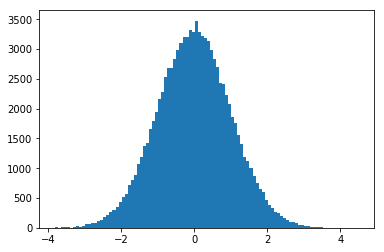

In [0]:
# 3.33 정규분포 그래프를 히스토그램으로 나타내기
import matplotlib.pyplot as plt
random_normal = tf.random.normal([100000],0,1)
plt.hist(random_normal, bins=100)
plt.show()

## 3.4.2 2-레이어 XOR 네트워크의 정보 시각화

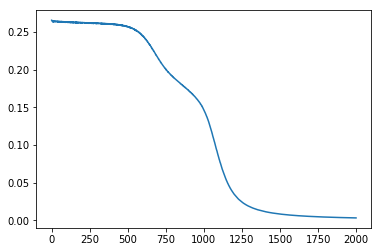

In [0]:
# 3.34 2-레이어 XOR 네트워크의 loss 변화를 선 그래프로 표시
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])